In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [6]:
data = {
     'Date': ['2025-01-05','2025-01-12','2025-02-20','2025-03-15','2025-04-25','2025-05-10','2025-06-05'],
    'Product_Category': ['Electronics','Clothing','Grocery','Electronics','Clothing','Grocery','Electronics'],
    'Product': ['Smartphone','Jeans','Rice (10kg)','Laptop','T-Shirts','Cooking Oil','Headphones'],
    'Units_Sold': [50,120,200,30,300,250,80],
    'Unit_Price': [20000,1200,600,50000,500,200,2000],
    'Profit_Margin': [0.20,0.25,0.10,0.18,0.30,0.08,0.22]
}

df = pd.DataFrame(data)

In [7]:
df

,Date,Product_Category,Product,Units_Sold,Unit_Price,Profit_Margin
0,2025-01-05,Electronics,Smartphone,50,20000,0.20
1,2025-01-12,Clothing,Jeans,120,1200,0.25
2,2025-02-20,Grocery,Rice (10kg),200,600,0.10
3,2025-03-15,Electronics,Laptop,30,50000,0.18
4,2025-04-25,Clothing,T-Shirts,300,500,0.30
5,2025-05-10,Grocery,Cooking Oil,250,200,0.08
6,2025-06-05,Electronics,Headphones,80,2000,0.22


In [8]:
df.shape

(7, 6)

In [9]:
df.head()

,Date,Product_Category,Product,Units_Sold,Unit_Price,Profit_Margin
0,2025-01-05,Electronics,Smartphone,50,20000,0.20
1,2025-01-12,Clothing,Jeans,120,1200,0.25
2,2025-02-20,Grocery,Rice (10kg),200,600,0.10
3,2025-03-15,Electronics,Laptop,30,50000,0.18
4,2025-04-25,Clothing,T-Shirts,300,500,0.30


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              7 non-null      object 
 1   Product_Category  7 non-null      object 
 2   Product           7 non-null      object 
 3   Units_Sold        7 non-null      int64  
 4   Unit_Price        7 non-null      int64  
 5   Profit_Margin     7 non-null      float64
dtypes: float64(1), int64(2), object(3)
memory usage: 468.0+ bytes


In [11]:
df.describe()

,Units_Sold,Unit_Price,Profit_Margin
count,7.000000,7.000000,7.000000
mean,147.142857,10642.857143,0.190000
std,104.197614,18766.979613,0.078528
min,30.000000,200.000000,0.080000
25%,65.000000,550.000000,0.140000
50%,120.000000,1200.000000,0.200000
75%,225.000000,11000.000000,0.235000
max,300.000000,50000.000000,0.300000


In [12]:
df.isnull().sum()

Date                0
Product_Category    0
Product             0
Units_Sold          0
Unit_Price          0
Profit_Margin       0
dtype: int64

In [13]:
df.columns

Index(['Date', 'Product_Category', 'Product', 'Units_Sold', 'Unit_Price',
       'Profit_Margin'],
      dtype='object')

Calculate total Sales

In [14]:
df['Total_Sales']= df['Units_Sold'] * df['Unit_Price']

Convert date column

In [15]:
df['Date']= pd.to_datetime(df['Date'])
df['Month']= df['Date'].dt.strftime('%b')

Monthly Sales Analysis

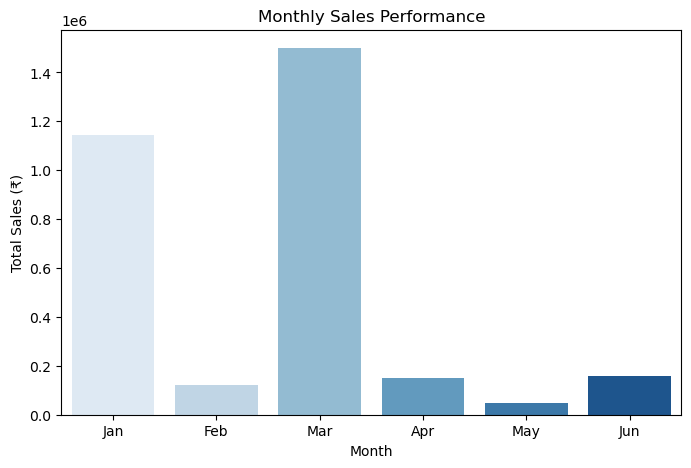

In [16]:
monthly_sales = df.groupby('Month')['Total_Sales'].sum().reindex(
    ['Jan','Feb','Mar','Apr','May','Jun']
)

plt.figure(figsize=(8,5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="Blues")
plt.title("Monthly Sales Performance")
plt.ylabel("Total Sales (₹)")
plt.show()

Category-Wise Contribution

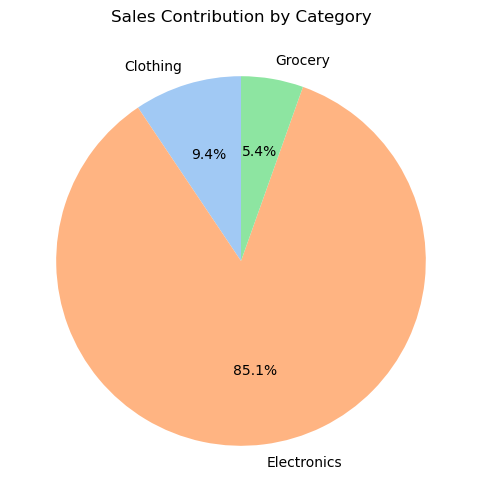

In [17]:
category_sales = df.groupby('Product_Category')['Total_Sales'].sum()

plt.figure(figsize=(6,6))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Sales Contribution by Category")
plt.show()


Profit Margin Analysis

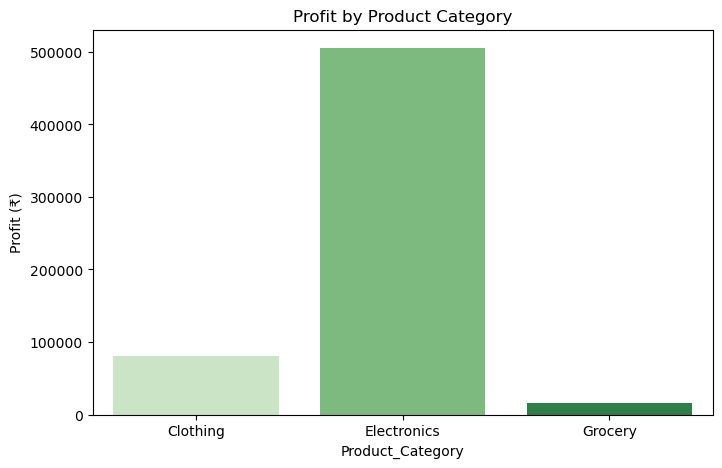

In [18]:
df['Profit'] = df['Total_Sales'] * df['Profit_Margin']

profit_by_category = df.groupby('Product_Category')['Profit'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=profit_by_category.index, y=profit_by_category.values, palette="Greens")
plt.title("Profit by Product Category")
plt.ylabel("Profit (₹)")
plt.show()


Key Insights (Print Statements)

In [19]:
print("📊 Key Insights:")
print("- Highest Sales Month:", monthly_sales.idxmax(), "with ₹", monthly_sales.max())
print("- Lowest Sales Month:", monthly_sales.idxmin(), "with ₹", monthly_sales.min())
print("- Best Performing Category (Sales):", category_sales.idxmax())
print("- Most Profitable Category:", profit_by_category.idxmax())


📊 Key Insights:
- Highest Sales Month: Mar with ₹ 1500000
- Lowest Sales Month: May with ₹ 50000
- Best Performing Category (Sales): Electronics
- Most Profitable Category: Electronics
